<a href="https://colab.research.google.com/github/Guto81/14IA/blob/master/Deep_learning_FIAP_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()  

170500096/170498071 [==============================] - 5s 0us/step


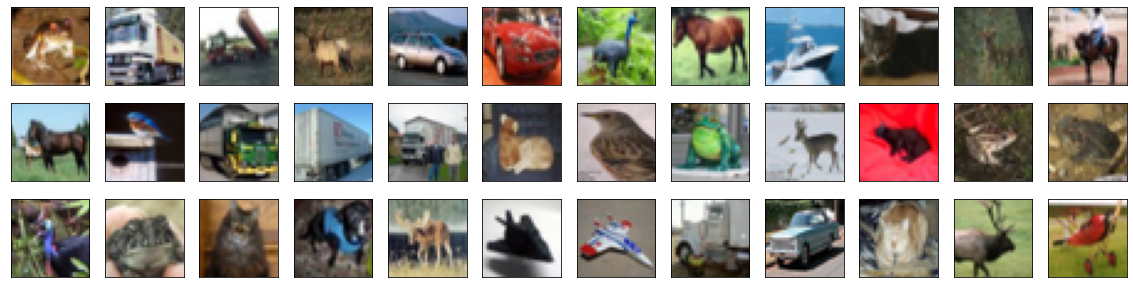

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,5))

for i in range(36):
  ax= fig.add_subplot(3,12,i+1,xticks=[],yticks=[]) 
  ax.imshow(np.squeeze(x_train[i]))


In [4]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [5]:
from keras.utils import np_utils

num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print ('formato x_train:', x_train.shape)

print(x_train.shape[0], 'amostras de treinamento')
print(x_test.shape[0], 'amostras de teste')
print(x_valid.shape[0], 'amostras de validação')


formato x_train: (45000, 32, 32, 3)
45000 amostras de treinamento
10000 amostras de teste
5000 amostras de validação


# 3 camadas convolucionais > pooling (max) > 100 neuronios > testar com mais neuronios > dropout seguido de flatten fazer o sanduiche

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [7]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=2, padding='same',activation='relu', input_shape=(32, 32,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=2, padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 128)         0

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])

#Guardar em HD F5 para pegar os pesos > Testar transfer learning > tentar mudar Epoch

In [12]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5',save_best_only=True)

hist = model.fit(x_train, y_train, batch_size=64, epochs=15,
                 validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
                 shuffle=True)

Epoch 1/15
704/704 [==============================] - 4s 5ms/step - loss: 1.7440 - accuracy: 0.3712 - val_loss: 1.6223 - val_accuracy: 0.4344
Epoch 2/15
704/704 [==============================] - 3s 5ms/step - loss: 1.3671 - accuracy: 0.5153 - val_loss: 1.3216 - val_accuracy: 0.5314
Epoch 3/15
704/704 [==============================] - 3s 5ms/step - loss: 1.2114 - accuracy: 0.5714 - val_loss: 1.5462 - val_accuracy: 0.4952
Epoch 4/15
704/704 [==============================] - 3s 5ms/step - loss: 1.1030 - accuracy: 0.6107 - val_loss: 1.1448 - val_accuracy: 0.5796
Epoch 5/15
704/704 [==============================] - 3s 5ms/step - loss: 1.0257 - accuracy: 0.6399 - val_loss: 1.0677 - val_accuracy: 0.6164
Epoch 6/15
704/704 [==============================] - 3s 5ms/step - loss: 0.9681 - accuracy: 0.6614 - val_loss: 1.3478 - val_accuracy: 0.5596
Epoch 7/15
704/704 [==============================] - 3s 5ms/step - loss: 0.9280 - accuracy: 0.6770 - val_loss: 1.0076 - val_accuracy: 0.6578
Epoch 

In [13]:
score = model.evaluate(x_test, y_test)
print('Acuracia de Teste:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.9522 - accuracy: 0.6876
Acuracia de Teste: 0.6876000165939331


#Fazer uma predição na figura, visualizar

In [14]:
y_hat = model.predict(x_test)

cifar10_labels = ['airplane', 'automobile', 'bird', 'cat','deer','dog','frog','horse','ship','truck']

#idx vai ser nossa predição > aumentando o X e Y (4,8,i+1,xticks.....fazer caber mais imagens

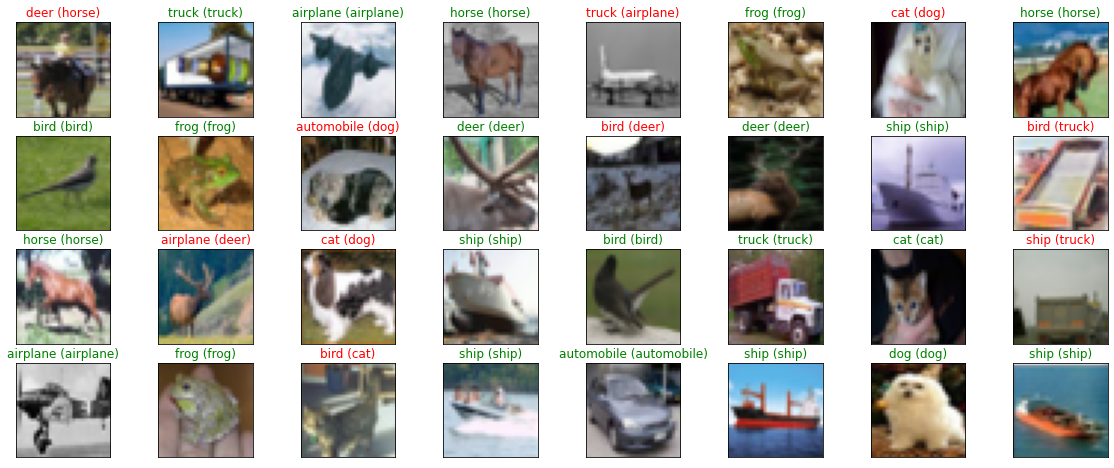

In [15]:
fig = plt.figure(figsize=(20,8))

for i, idx in enumerate (np.random.choice(x_test.shape[0],size=32)):
  ax= fig.add_subplot(4,8,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(x_test[idx]))
  pred_idx = np.argmax(y_hat[idx])
  true_idx = np.argmax(y_test[idx])

  ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
               color=("green"if pred_idx == true_idx else "red"))
